In [ ]:
'''# Here We are importing Iris dataset
from google.colab import files
uploaded = files.upload()'''

'# Here We are importing Iris dataset\nfrom google.colab import files\nuploaded = files.upload()'

Here we are going to implement the SVM Model . SVM is a powerful model as well as time expensive . It can be used a classifier as well as a regressor. Here we are going to use it as a classifier.

Before going into staright implementation , lets talk about the iris dataset and intuition and math behind SVM.

In [ ]:
import pandas as pd
import numpy as np
# Data preprocessors
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Model Imports
from sklearn.svm import SVC
# plotting tools
from matplotlib import pyplot as plt

Iris Dataset contains 3 types of flowers namely 'Iris-Setosa' , 'Iris-Versicolor' and 'Iris-Virginica'

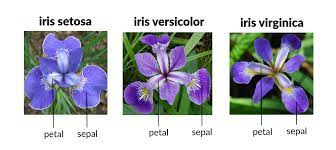

This dataset have four features namely 'SepalWidthCm', 'PetalWidthcm' ,'SepalLengthcm' , 'PetalLengthcm'. However here we are going to use two features sepal and petal length and we are going to drop sepal and petal width. We are going to use only two features because it is easy to visualize the Hyperplane. And we are going to make classification between only two flowers again because easy visualization.

In [ ]:
# first 100 contains two flowers , so we are going to use only first 100 rows.
data = pd.read_csv('Iris.csv')
data = data[:100]
data = data.drop(['SepalWidthCm','PetalWidthCm'],axis=1)

In [ ]:
print(data.head(),'\n')
print(data.tail(),'\n \n') # checking our data here
print(data.info())

   Id  SepalLengthCm  PetalLengthCm      Species
0   1            5.1            1.4  Iris-setosa
1   2            4.9            1.4  Iris-setosa
2   3            4.7            1.3  Iris-setosa
3   4            4.6            1.5  Iris-setosa
4   5            5.0            1.4  Iris-setosa 

     Id  SepalLengthCm  PetalLengthCm          Species
95   96            5.7            4.2  Iris-versicolor
96   97            5.7            4.2  Iris-versicolor
97   98            6.2            4.3  Iris-versicolor
98   99            5.1            3.0  Iris-versicolor
99  100            5.7            4.1  Iris-versicolor 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   Species        100 non-null    object 
dty

 shape of Xdata (100, 2)


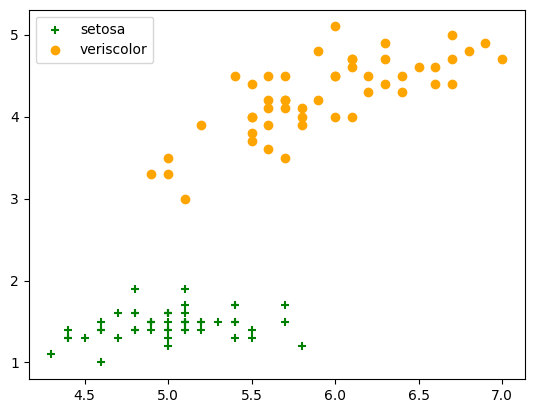

In [ ]:
# extracting our required data:

target = np.array(data['Species'].apply(lambda x: 1 if x=="Iris-setosa" else -1)) # here extracting the target values and assiging 1 to iris-setosa and -1 to versicolor
sepal = np.array(data['SepalLengthCm'])
petal = np.array(data['PetalLengthCm'])
X = np.transpose([sepal,petal])  #transpose to make them paired , used later to create train and test data
verification_data = np.transpose([sepal,petal,target]) # will be used later
print(f' shape of Xdata {X.shape}') # checking the shape

# Plotting the data:

plt.scatter(sepal[target == 1],petal[target == 1],marker='+',color='green',label="setosa")
plt.scatter(sepal[target != 1],petal[target != 1],marker='o',color='orange',label="veriscolor")
plt.legend(loc='best')

# Implementation of Linear SVM Using SKLearn

In [ ]:
# Implementation of SVM using SKlearn

X,Y = shuffle(X,target,random_state=42) # shuffling the dataset , so it can learn better
x_train , x_test , y_train ,y_test = train_test_split(X, Y, train_size=0.90)
print("Train Shape",x_train.shape)

Train Shape (90, 2)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear', probability=True)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(f' accuracy = {accuracy_score(y_test,y_pred)} ')
print(f' coefficients of the class variables = {clf.coef_} ')
print(' intercept  = ',clf.intercept_)
w1,w2 = clf.coef_[0][0] , clf.coef_[0][1]
c = clf.intercept_

 accuracy = 1.0 
 coefficients of the class variables = [[-0.02335033 -1.42690456]] 
 intercept  =  [3.82320082]


 y = mx + c format ; m = -0.01636432209883241 , c = [2.67936688]


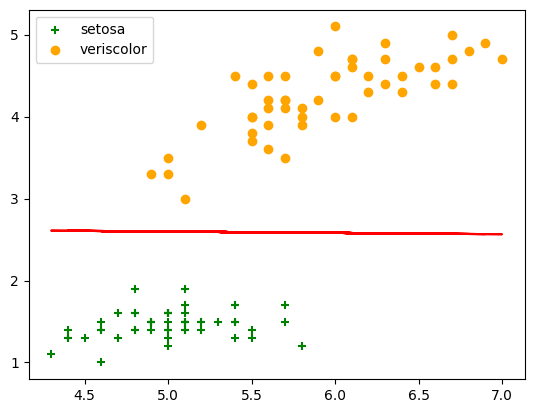

In [ ]:
print(f' y = mx + c format ; m = {-w1/w2} , c = {- c/w2}')

# plotting the data to visualize the results :

plt.scatter(sepal[target == 1],petal[target == 1],marker='+',color='green',label="setosa")
plt.scatter(sepal[target != 1],petal[target != 1],marker='o',color='orange',label="veriscolor")
x = x_train[:,0]
y = -w1*x_train[:,0]/w2 - c/w2
plt.plot(x,y,color='red')
plt.legend(loc='best')

In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df = df.drop(['Person ID','Gender','Occupation','Physical Activity Level',
              'BMI Category','Blood Pressure','Heart Rate','Daily Steps','Stress Level','Age'],axis=1)
df.dropna()
df

,Sleep Duration,Quality of Sleep,Sleep Disorder
0,6.1,6,None
1,6.2,6,None
2,6.2,6,None
3,5.9,4,Sleep Apnea
4,5.9,4,Sleep Apnea
...,...,...,...
369,8.1,9,Sleep Apnea
370,8.0,9,Sleep Apnea
371,8.1,9,Sleep Apnea
372,8.1,9,Sleep Apnea


 shape of Xdata (374, 2)


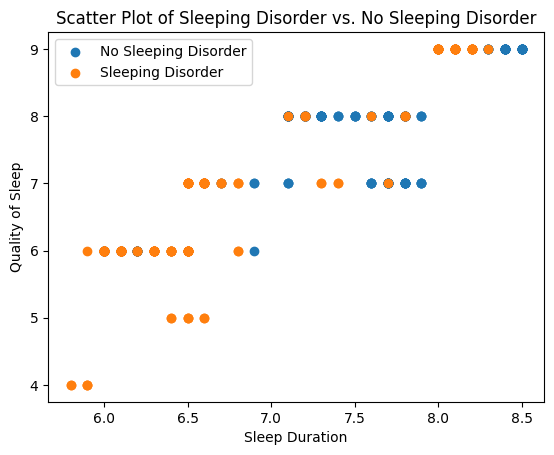

In [ ]:
# extracting our required data:

target = np.array(df['Sleep Disorder'].apply(lambda x: -1 if x=="None" else 1)) # here extracting the target values and assiging 1 to iris-setosa and -1 to versicolor
quality = np.array(df['Quality of Sleep'])
duration = np.array(df['Sleep Duration'])
X = np.transpose([duration,quality])  #transpose to make them paired , used later to create train and test data
verification_data = np.transpose([duration,quality,target]) # will be used later
print(f' shape of Xdata {X.shape}') # checking the shape

# Plotting the data:

plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.title('Scatter Plot of Sleeping Disorder vs. No Sleeping Disorder')
plt.scatter(duration[target == -1], quality[target == -1], label='No Sleeping Disorder')
plt.scatter(duration[target != -1], quality[target != -1], label='Sleeping Disorder')
plt.legend(loc='best')

In [ ]:
# Implementation of SVM using SKlearn

X,Y = shuffle(X,target,random_state=42) # shuffling the dataset , so it can learn better
x_train , x_test , y_train ,y_test = train_test_split(X, Y, train_size=0.80)
print("Train Shape",x_train.shape)

Train Shape (299, 2)


# Implementation of SVM Using a Polynomial Kernel (SKLearn)

In [ ]:
deg = [1,2,3,4,5]
acc = []
for i in deg:
  clf = SVC(kernel='poly',degree = i,coef0=0.0, probability=True)
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  acc.append(accuracy_score(y_test,y_pred))
  clf = None
print(f'Degree array {deg}')
print(f'Accuracy array {acc}')


Degree array [1, 2, 3, 4, 5]
Accuracy array [0.7333333333333333, 0.7466666666666667, 0.7733333333333333, 0.5733333333333334, 0.5733333333333334]


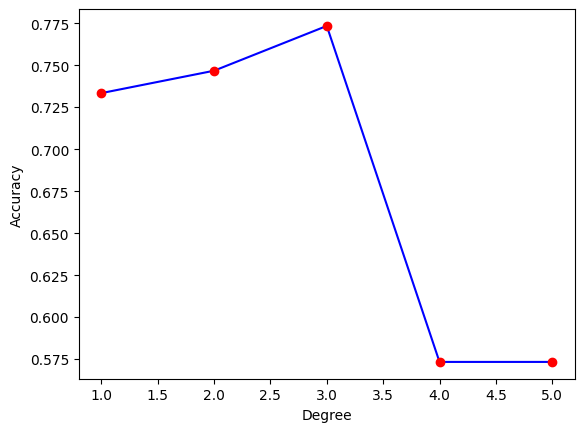

In [ ]:
plt.plot(deg, acc, 'b-')
plt.plot(deg, acc, 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Degree')
plt.show()

# Implementation of SVM Using an RBF Kernel(SKLearn)

In [ ]:
gam = [0.0001,0.001,0.0012,0.0015,0.0016,0.0017,0.1,1,10,100,200,400,1000,10000]
acc = []
for i in gam:
  clf = SVC(kernel='rbf', gamma = i, probability=True)
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  acc.append(accuracy_score(y_test,y_pred))
  clf = None
print(f'Gamma array {gam}')
print(f'Accuracy array {acc}')

Gamma array [0.0001, 0.001, 0.0012, 0.0015, 0.0016, 0.0017, 0.1, 1, 10, 100, 200, 400, 1000, 10000]
Accuracy array [0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.7333333333333333, 0.84, 0.88, 0.9066666666666666, 0.9066666666666666, 0.92, 0.9066666666666666, 0.9066666666666666]


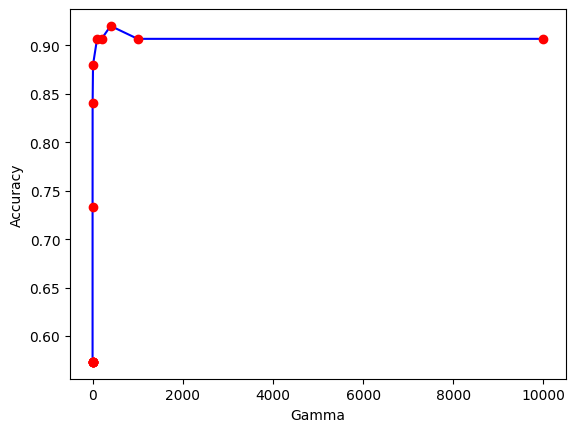

In [ ]:
import matplotlib.pyplot as plt
plt.plot(gam, acc, 'b-')
plt.plot(gam, acc, 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Gamma')
plt.show()